# Regresión Lineal para precios de casas en Boston
En esta notebook se realiza una regresion lineal para estimar el precio de las casas en Boston.

## Importando datos

se importa la data de un repositorio con la informacion relevante sobre el problema.

In [1]:
import pandas as pd

df = pd.read_csv(
    "housing_edf82b23-51e2-4f57-887d-6be67da34d27.data", header=None, sep="\s+"
)
df.columns = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "MEDV",
]
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\diego\AppData\Local\Temp\ipykernel_17608\2080138846.py:4: SyntaxWarning: invalid escape sequence '\s'
  "housing_edf82b23-51e2-4f57-887d-6be67da34d27.data", header=None, sep="\s+"


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<b>El significado de cada una de las columnas es el siguiente:<b>

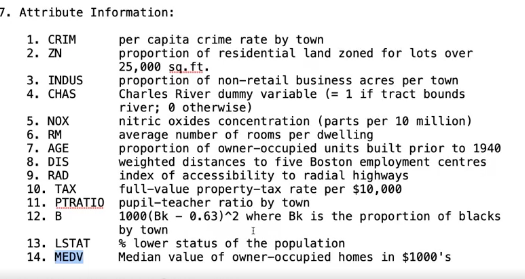

## Entendiendo los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. 

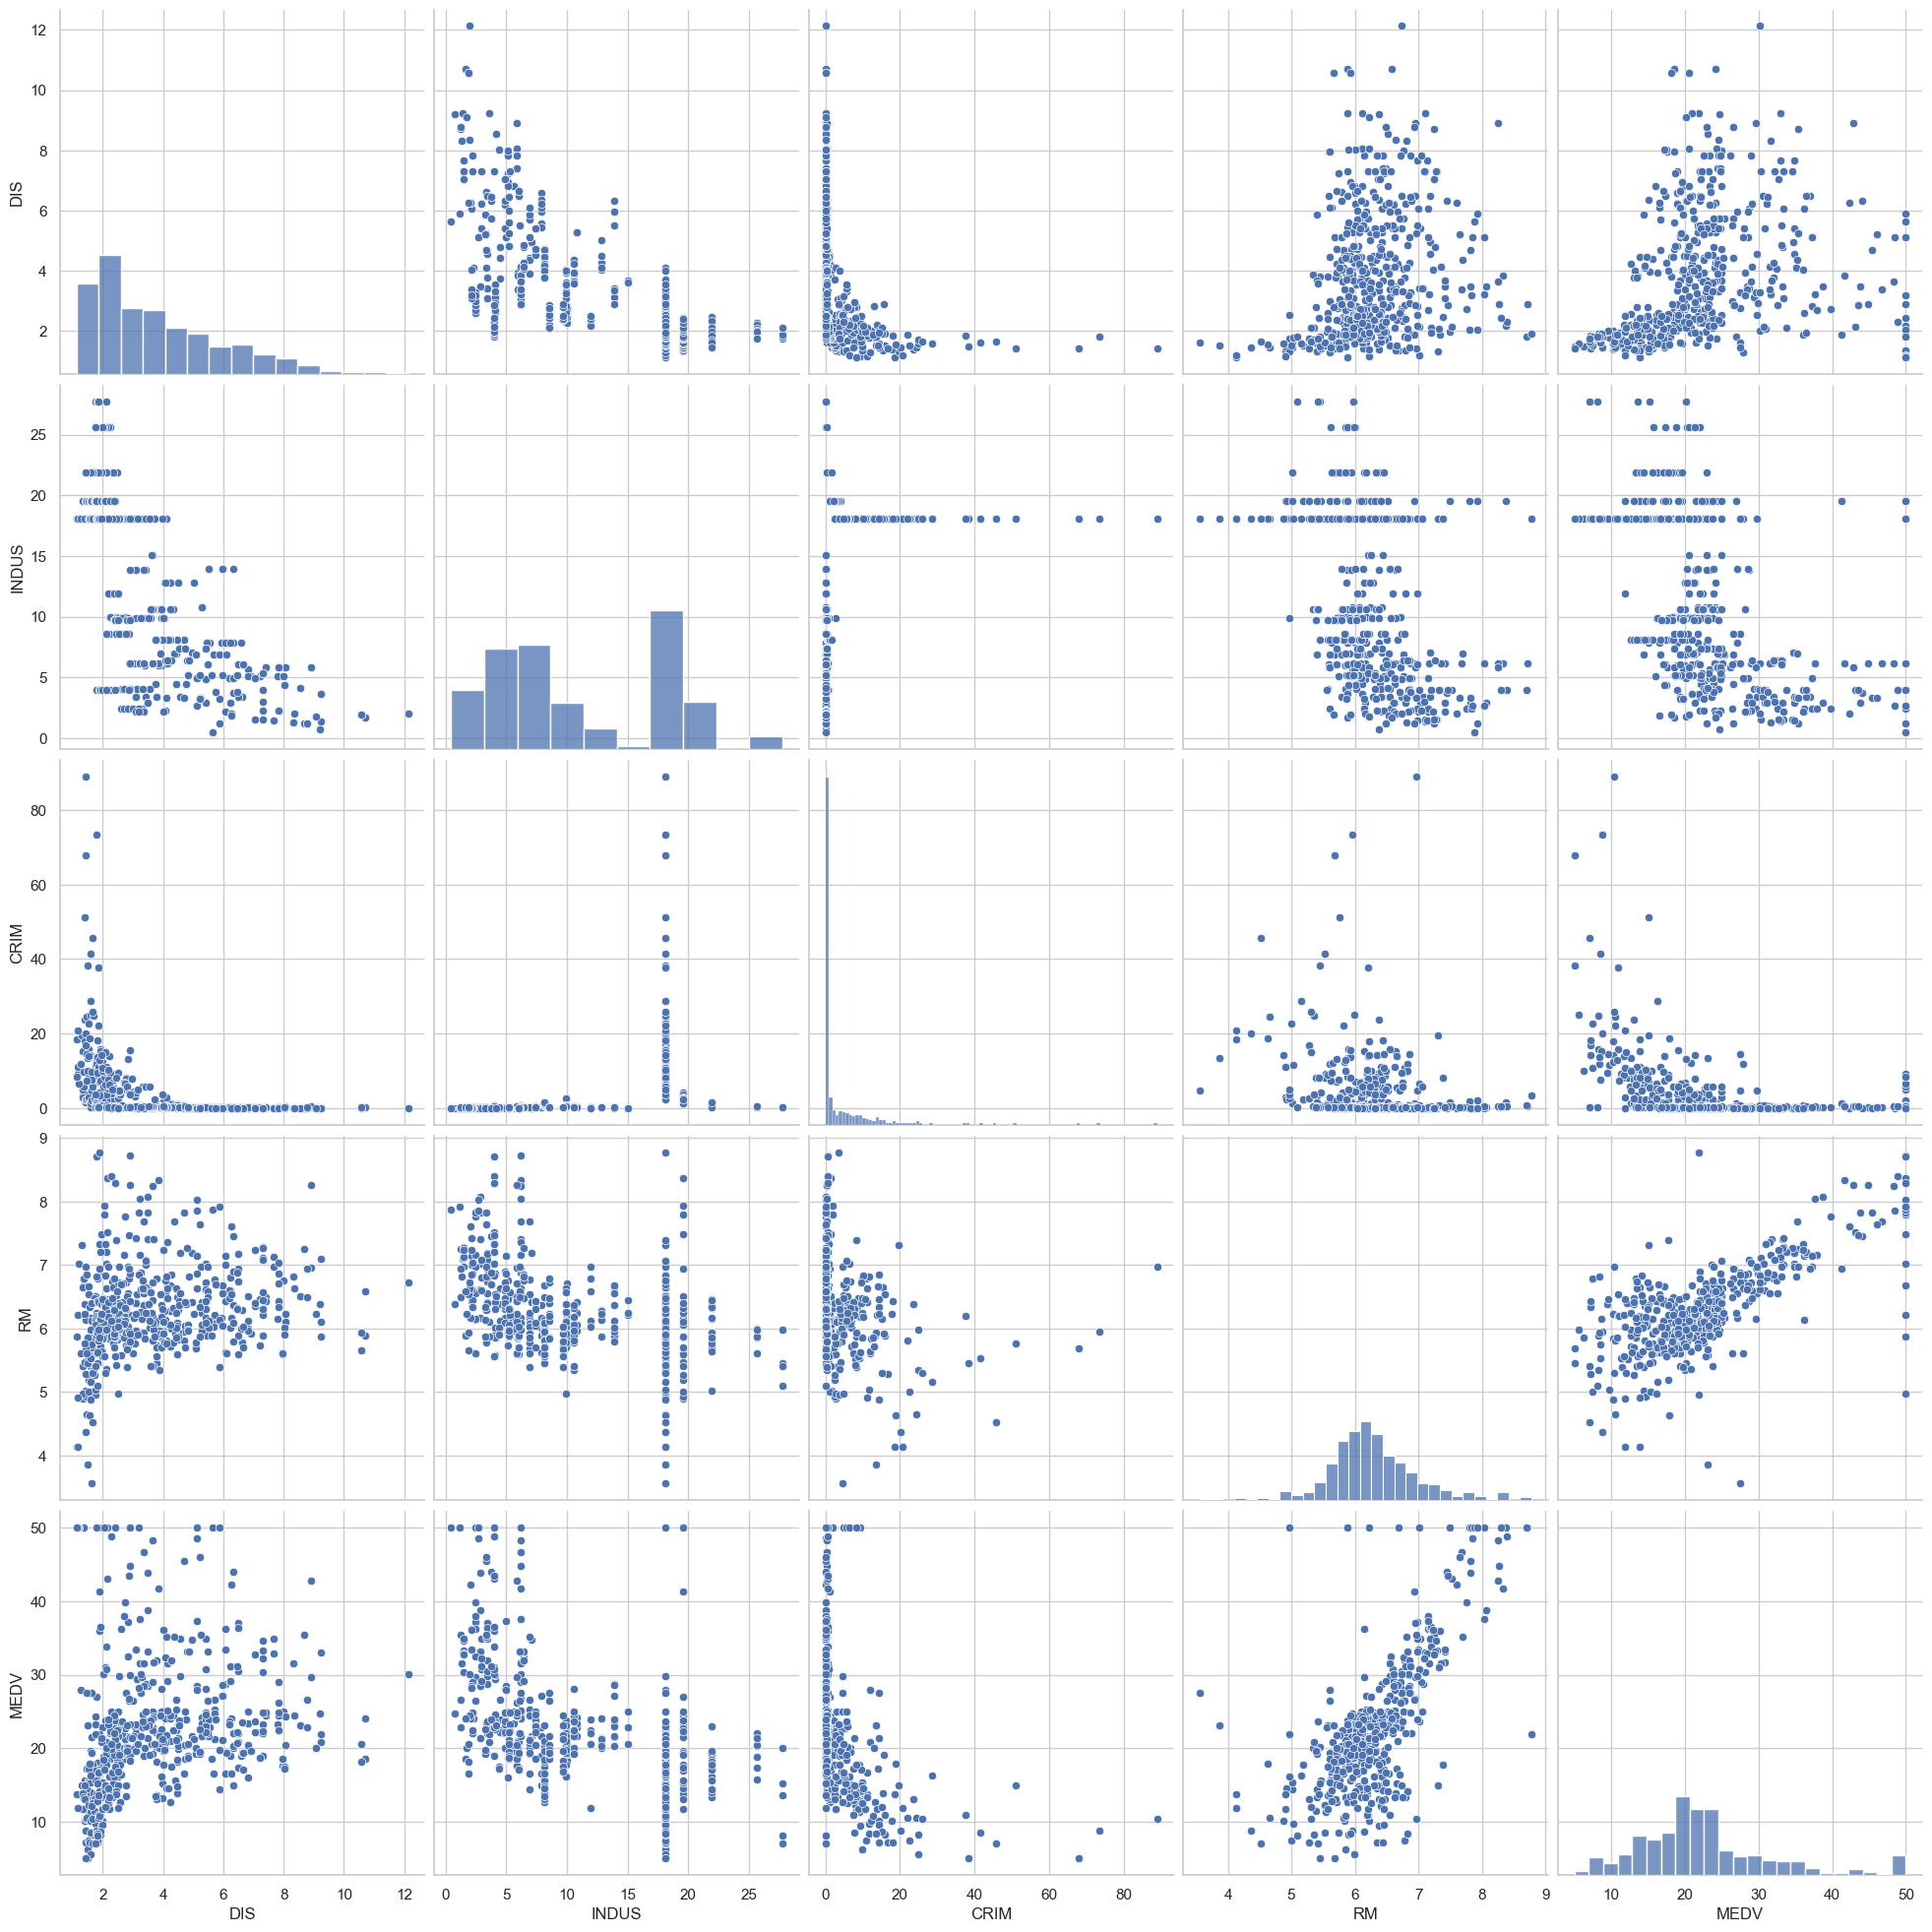

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")
cols = ["DIS", "INDUS", "CRIM", "RM", "MEDV"]
sns.pairplot(df[cols], height=4)
plt.show()

Desde la grafica, es posible ver varios valores con disperciones no muy dicientes, a excepcion de las relaciones entre RM y MEDV. Una vez que se ve cómo están correlacionadas las variables de manera visual es importante usar un método numérico para poder entender las correlaciones en este caso utilizando una matriz de correlación. 

<Axes: >

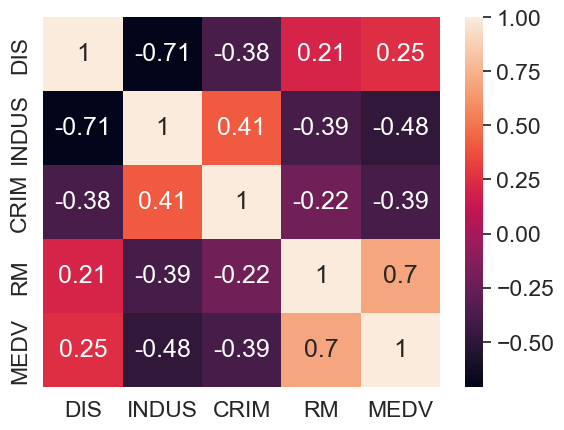

In [3]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)  # matriz dxe correlación
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

## Creando modelo con scikit-learn

Se genera el modelo de regresión lineal utilizando la libreria de sklearn.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x = df["RM"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(x_std, y_std)

LinearRegression()

## Análisis de resultados

Se genera una respuesta de la aproximación lineal para los datos normalizados.

Text(0.5, 0, 'Promedio de habitaciones [RM]')

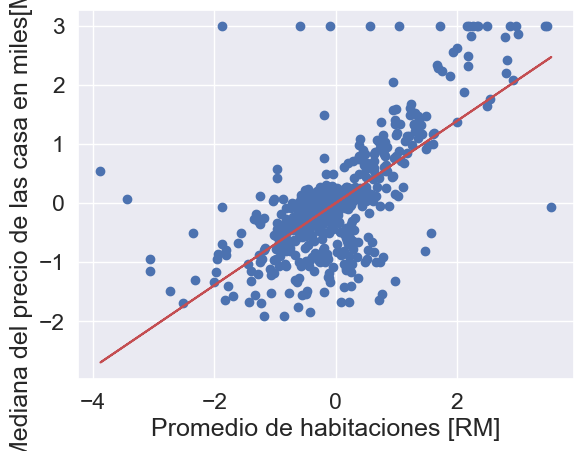

In [5]:
plt.scatter(x_std, y_std)
plt.plot(x_std, slr.predict(x_std), color="r")
plt.ylabel("Mediana del precio de las casa en miles[MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

## Generando predicción con el modelo

Se genera el modelo para predecir el comportamiento de para un promedio de habitaciones en especifico:

In [6]:
num_hab = 238
num_hab_std = sc_x.transform(np.array([num_hab]).reshape(-1, 1))
print(
    "el precio de una casa con 5 habitaciones en boston es de",
    sc_y.inverse_transform(slr.predict(num_hab_std)),
)

el precio de una casa con 5 habitaciones en boston es de [[2131.63131674]]
